In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [31]:
user_indices = np.random.randint(0,num_users,2000)
item_indices = np.random.randint(0,num_items,2000)

In [49]:
embeddings_pth = torch.load('/root/cyj/NRGCF_Pytorch/code/SGL==1.0 dataset==amazon-book_0.2.pth')
num_users_embeddings = embeddings_pth['user_emb.weight'].cpu().numpy()
num_items_embeddings = embeddings_pth['item_emb.weight'].cpu().numpy()  
num_users = num_users_embeddings.shape[0]
num_items = num_items_embeddings.shape[0]



array([[ 0.59265715,  1.271387  , -0.94476277, ...,  2.5261786 ,
        -1.3259363 , -0.36088482],
       [-0.5619105 ,  0.5597287 , -0.02869545, ..., -0.00487655,
         0.20858808,  1.0657923 ],
       [ 0.38355216,  0.51043403, -0.977329  , ..., -0.88037354,
        -0.77169496, -0.03005549],
       ...,
       [-0.49678898, -0.448249  ,  0.7361525 , ...,  0.2911885 ,
        -0.25069168,  0.153288  ],
       [ 0.02999956, -0.31961763, -0.04781798, ...,  0.23392995,
        -0.28712493, -0.30420426],
       [ 0.11808311, -0.30514085, -0.08594462, ...,  0.13141982,
        -0.25718015, -0.2015195 ]], dtype=float32)

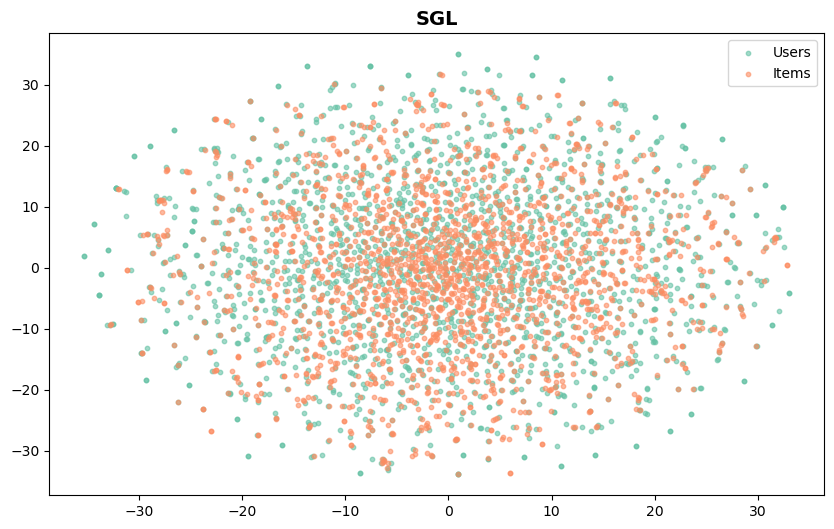

In [50]:


sampled_users_embeddings = num_users_embeddings[user_indices]
sampled_items_embeddings = num_items_embeddings[item_indices]

# 合并用户和物品的嵌入
embeddings = np.vstack((sampled_users_embeddings, sampled_items_embeddings))

# 使用 t-SNE 降维到 2 维
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# 分离降维后的用户和物品嵌入
num_users_2d = embeddings_2d[:user_indices.shape[0]]
num_items_2d = embeddings_2d[user_indices.shape[0]:]

# 绘制用户和物品的嵌入点，使用不同的颜色
plt.figure(figsize=(10, 6))
plt.scatter(num_users_2d[:, 0], num_users_2d[:, 1], c='#66c2a5', alpha=0.6, label='Users', s=10)  # Light green color
plt.scatter(num_items_2d[:, 0], num_items_2d[:, 1], c='#fc8d62', alpha=0.6, label='Items', s=10)  # Light orange color
plt.legend()
plt.title('SGL',fontsize=14,fontweight='bold')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
plt.show()

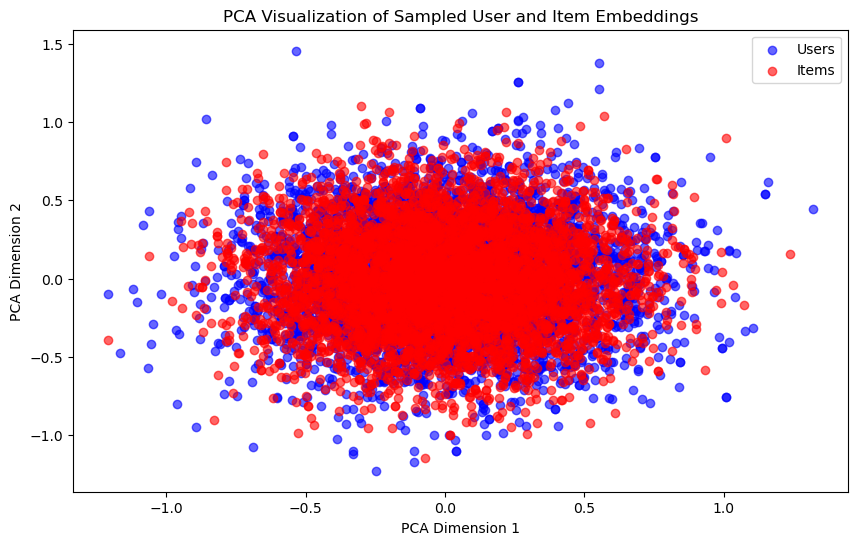

In [22]:
sampled_users_embeddings = num_users_embeddings[user_indices]
sampled_items_embeddings = num_items_embeddings[item_indices]

# 合并用户和物品的嵌入
embeddings = np.vstack((sampled_users_embeddings, sampled_items_embeddings))

# 使用 PCA 降维到 2 维
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# 分离降维后的用户和物品嵌入
num_users_2d = embeddings_2d[:user_indices.shape[0]]
num_items_2d = embeddings_2d[user_indices.shape[0]:]
plt.figure(figsize=(10, 6))
plt.scatter(num_users_2d[:, 0], num_users_2d[:, 1], c='blue', label='Users', alpha=0.6)
plt.scatter(num_items_2d[:, 0], num_items_2d[:, 1], c='red', label='Items', alpha=0.6)

# 设置 x 和 y 轴的范围
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)

# 添加标题、图例和坐标轴标签
plt.legend()
plt.title('PCA Visualization of Sampled User and Item Embeddings')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

# 显示图像
plt.show()

/root/miniconda3/envs/CYJ/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


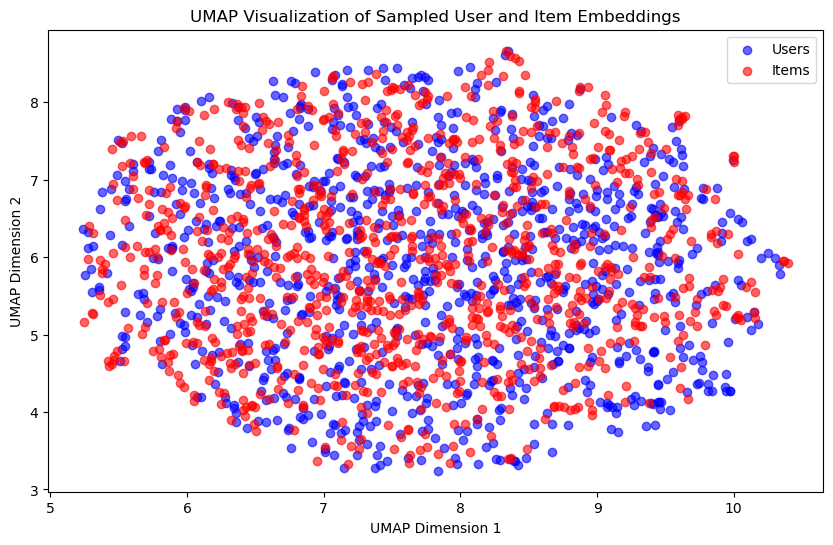

In [41]:
sampled_users_embeddings = num_users_embeddings[user_indices]
sampled_items_embeddings = num_items_embeddings[item_indices]

# 合并用户和物品的嵌入
embeddings = np.vstack((sampled_users_embeddings, sampled_items_embeddings))

# 使用 UMAP 降维到 2 维
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_reducer.fit_transform(embeddings)

# 分离降维后的用户和物品嵌入
num_users_2d = embeddings_2d[:num_users_sample]
num_items_2d = embeddings_2d[num_users_sample:]

# 绘制用户和物品的嵌入点，使用不同的颜色
plt.figure(figsize=(10, 6))
plt.scatter(num_users_2d[:, 0], num_users_2d[:, 1], c='blue', label='Users', alpha=0.6)
plt.scatter(num_items_2d[:, 0], num_items_2d[:, 1], c='red', label='Items', alpha=0.6)
plt.legend()
plt.title('UMAP Visualization of Sampled User and Item Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()